## Power Rating Prediction using Random Forest Classifier

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("dataset.csv")
df.head()

,Unnamed: 0,power_rating,weight_of_copper,category
0,0,16.46,34.69,high
1,1,12.52,28.78,high
2,2,7.66,21.48,high
3,3,21.09,41.64,high
4,4,24.43,46.64,high


In [27]:
df = df.drop("Unnamed: 0", axis=1)
df.head()

,power_rating,weight_of_copper,category
0,16.46,34.69,high
1,12.52,28.78,high
2,7.66,21.48,high
3,21.09,41.64,high
4,24.43,46.64,high


In [28]:
K = {"low":0, "high":1}
df['category'] = df['category'].map(K)
X = df[["power_rating", "weight_of_copper"]]
y = df[["category"]]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train.values.ravel())

RandomForestClassifier(max_depth=2, random_state=0)

In [29]:
y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
y_true = y_test
data = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4) #for label size
df_cm

Accuracy Score:  1.0
Mean Squared Error:  0.0


Predicted,0,1
Actual,,
0,3,0
1,0,162


<Figure size 1000x700 with 0 Axes>

<Axes: xlabel='Predicted', ylabel='Actual'>

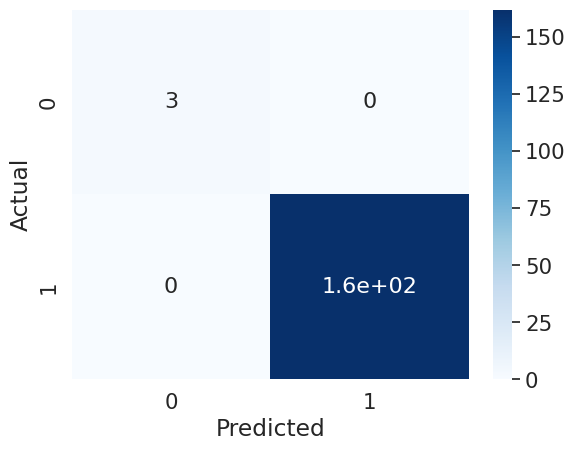

In [30]:
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16}) # font size